In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

C:\Users\my\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\my\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\my\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\my\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-04,60.962002,58.905998,59.377998,60.740002,50673000.0,60.740002
2017-04-05,60.976002,58.840000,60.408001,59.000000,39404500.0,59.000000
2017-04-06,60.388000,58.820000,59.375999,59.740002,27603000.0,59.740002
2017-04-07,60.537998,59.430000,59.500000,60.507999,22898000.0,60.507999
2017-04-10,62.745998,61.742001,61.830002,62.478001,38322500.0,62.478001
...,...,...,...,...,...,...
2022-03-29,1114.770020,1073.109985,1107.989990,1099.569946,24538300.0,1099.569946
2022-03-30,1113.949951,1084.000000,1091.170044,1093.989990,19955000.0,1093.989990
2022-03-31,1103.140015,1076.640015,1094.569946,1077.599976,16330900.0,1077.599976


## simple moving avarage

<AxesSubplot:xlabel='Date'>

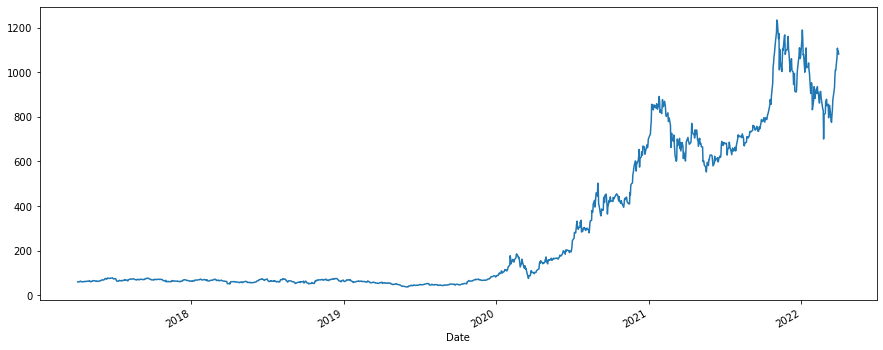

In [3]:
df_tesla['Open'].plot(figsize=(15,6))

In [4]:
df_tesla['open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

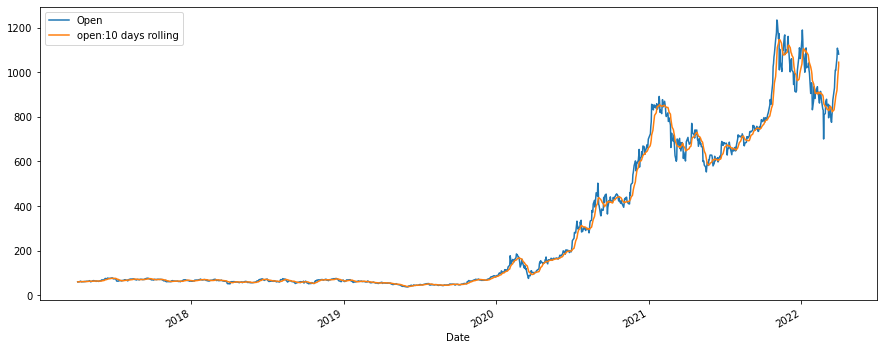

In [5]:
df_tesla[['Open','open:10 days rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

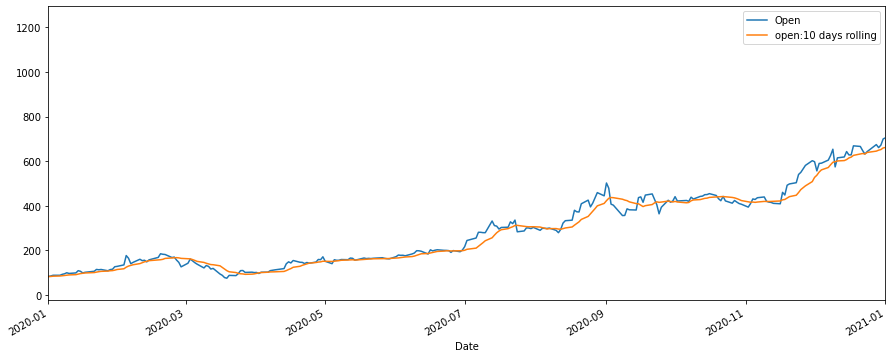

In [6]:
df_tesla[['Open','open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [7]:
df_tesla['open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

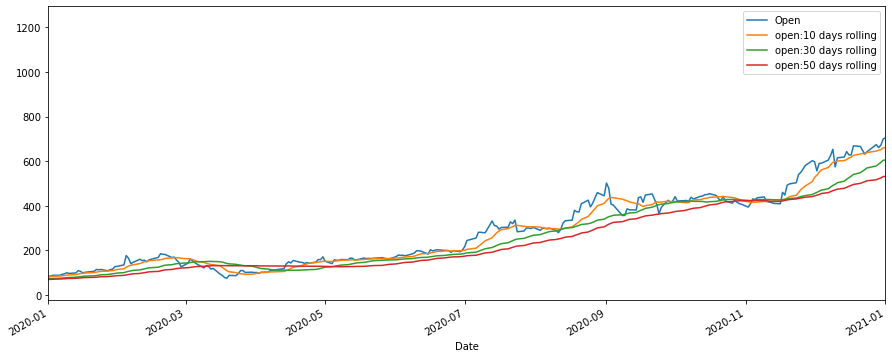

In [8]:
df_tesla[['Open','open:10 days rolling','open:30 days rolling','open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## cummulative moving avarage

<AxesSubplot:xlabel='Date'>

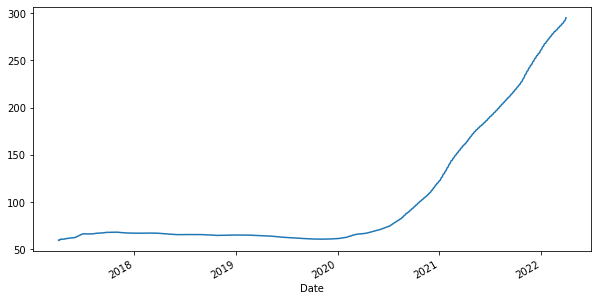

In [9]:
## Expanding
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [10]:
## EWMA - Exponential weighted moving avarage
# Exponential moving varage = ((close - prev EMA)*multiplier)+Prev EMA
# EWMA(t)= a * x(t) + (1-a) EMWA(t-1)
#  t time stamp
# use to prevent lag

## Exponential moving avarage

In [11]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()   ## alpha is smoothing factor

<AxesSubplot:xlabel='Date'>

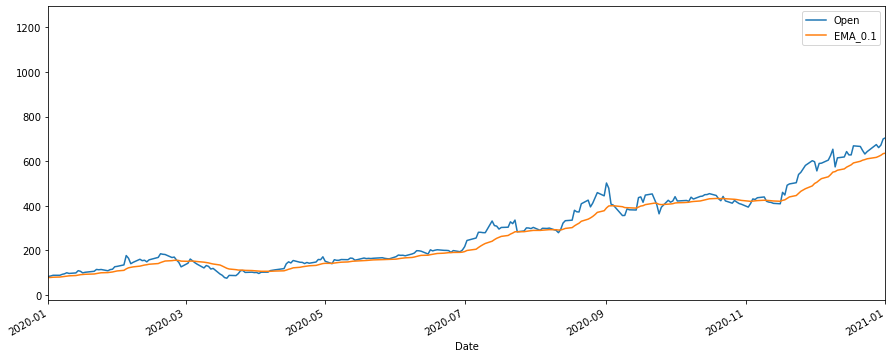

In [12]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [13]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

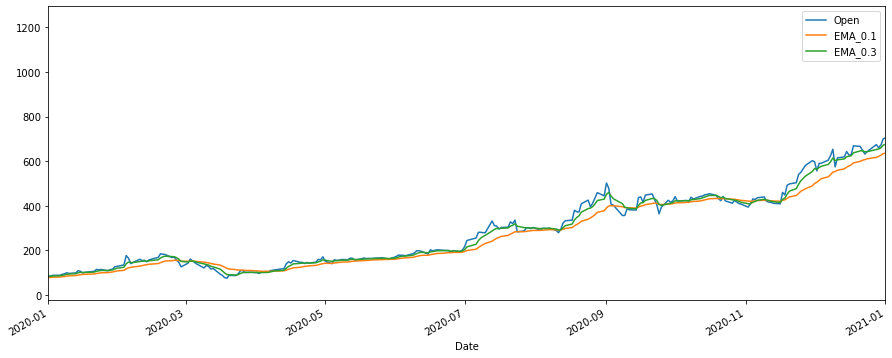

In [14]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))